In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

Numpy를 np로 지정.
sklearn에 포함한 데이터 셋에서 make_circles 기능과 SVM을 불러온다.



(-1.258102966153495,
 1.4139445202764211,
 -1.3458804378263505,
 1.2226138927658057)

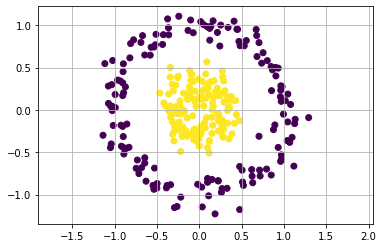

In [2]:
X, y = make_circles(300,factor=.3, noise=.1)
model4 = SVC(kernel = 'linear')
model4.fit(X,y)
x1 = X[:,0]
x2 = X[:,1]

plt.scatter(x1, x2, c=y)
plt.grid('on')
plt.axis('equal')

circle로 300개의 데이터

svm 커널을 linear로 고정

In [3]:
def PlotSVM2D(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    fig = plt.figure(figsize=(5,5))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

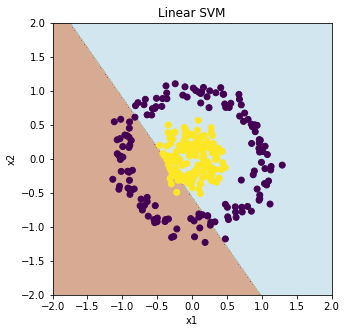

In [4]:
PlotSVM2D(X,y, model= model4, title = 'Linear SVM')

2D로 그리기

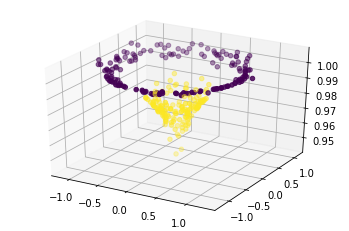

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x3 = (x1**2 +x2**2)**.01
ax.scatter(x1, x2,x3, c=y)


scatter = 값을 뿌린다. c <-색깔 옵션 Y가 0이면 다르게 표시
3D로 표시

feature(x3) (높이)를 수정하는 도중 블랙홀 모양의 feature을 사용

In [6]:
from mpl_toolkits import mplot3d
from ipywidgets import interact

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x1, x2, x3, c=y)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=(-90, 90), azip=(-180, 180));

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=30, descriptio…

그래프를 움직이는 기능 추가.(SVM 검색하다 찾음)

In [7]:
X3 = np.vstack((x1,x2,x3)).T
X3.shape
model4.fit(X3,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

numpy안에 stack(쌓는 함수)를 사용

In [8]:
def PlotSVM3D(X, Y, model):
  import numpy as np
  X1 = X[:, 0]
  X2 = X[:, 1]
  X3 = X[:, 2]
  w = model.coef_ 
  b = model.intercept_ 

  x1, x2 = np.meshgrid(X1, X2) 
  x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

  fig = plt.figure() 
  axes2 = fig.add_subplot(111, projection = '3d') 
  axes2.scatter(X1, X2, X3, c = Y) 
  axes1 = fig.gca(projection = '3d') 
  axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
  
  #plt.show()

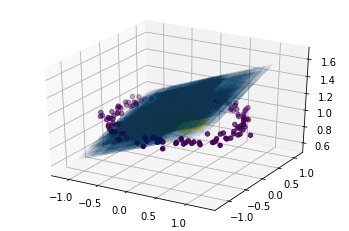

In [9]:
PlotSVM3D(X3,y,model = model4)


In [10]:
model5 = SVC(kernel = 'rbf')

In [11]:
model5.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

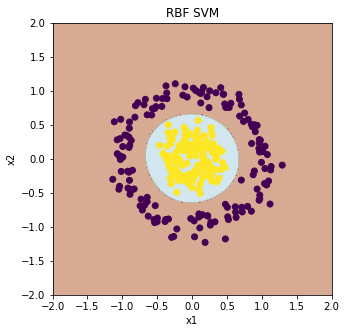

In [12]:
PlotSVM2D(X,y, model= model5, title = 'RBF SVM')

RBF 커널

RBF는 데이터를 고차원 특징 공간으로 사상해주는 것(방사선 방향)